# Analyze the data and extract useful insights.
---

In [ ]:
import os  # Importing the os module to interact with the operating system
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot to create static, animated, and interactive visualizations
import seaborn as sns  # Importing seaborn for creating attractive and informative statistical graphics

## Energy DataFrame
---

In [ ]:
# Define the folder path where the CSV files are located
folder_path = "/content/drive/MyDrive/Data/Final Project"

# Get a list of all files in the folder with the .csv extension
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read all CSV files and store them in a list of dataframes
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in files]

# Concatenate all dataframes in the list into a single dataframe, ignoring the index of the original dataframes
energy_df = pd.concat(dataframes, ignore_index=True)

# Print the summary of the dataframe, including the number of entries and column information
energy_df.info()

# Display the first 10 rows of the 'energy_df' DataFrame to preview the data
energy_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380252 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cell_id                  1380252 non-null  object 
 1   DateTime                 1380252 non-null  object 
 2   KWH/hh (per half hour)   1380252 non-null  float64
 3   site_id                  1380252 non-null  object 
 4   region                   1380252 non-null  object 
dtypes: float64(1), object(4)
memory usage: 52.7+ MB


,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A
5,MAC000002,"02:30:00 13,01,01",0.229,A,A
6,MAC000002,"03:00:00 13,01,01",0.194,A,A
7,MAC000002,"03:30:00 13,01,01",0.201,A,A
8,MAC000002,"04:00:00 13,01,01",0.122,A,A
9,MAC000002,"04:30:00 13,01,01",0.099,A,A


In [ ]:
# Check for missing (null) values in each column and sum them
energy_df.isnull().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0


In [ ]:
# Check for duplicate rows and count how many duplicates are present
energy_df.duplicated().sum()

942

In [ ]:
# Remove all duplicate rows from the DataFrame and update energy_df
energy_df = energy_df.drop_duplicates()

In [ ]:
# Convert the 'DateTime' column to a proper datetime format, invalid values will be set to NaT
energy_df['DateTime'] = pd.to_datetime(energy_df['DateTime'], format='%H:%M:%S %y,%m,%d', errors='coerce')

# Display the first 10 rows of the updated DataFrame
energy_df.head(10)

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A
5,MAC000002,2013-01-01 02:30:00,0.229,A,A
6,MAC000002,2013-01-01 03:00:00,0.194,A,A
7,MAC000002,2013-01-01 03:30:00,0.201,A,A
8,MAC000002,2013-01-01 04:00:00,0.122,A,A
9,MAC000002,2013-01-01 04:30:00,0.099,A,A


## Demand DataFrame
---

In [ ]:
# Read the 'Demand.xlsx' Excel file and load it into the 'demand' DataFrame
demand = pd.read_excel('/content/drive/MyDrive/Data/Final Project/Demand.xlsx')

# Display basic information about the 'demand' DataFrame, such as the number of rows, columns, and data types
demand.info()

# Display the first 10 rows of the 'demand' DataFrame to preview the data
demand.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
5,2013-01-01 02:30:00,Normal
6,2013-01-01 03:00:00,Normal
7,2013-01-01 03:30:00,Normal
8,2013-01-01 04:00:00,Normal
9,2013-01-01 04:30:00,Normal


In [ ]:
# Check for missing (null) values in each column and sum them
demand.isnull().sum()

,0
DemandDateTime,0
Demand,0


In [ ]:
# Check for duplicate rows and count how many duplicates are present
demand.duplicated().sum()

0

In [ ]:
# Print the unique values in the 'Demand' column to check for inconsistencies or variations
print(demand['Demand'].unique())

['Normal' 'Low' 'Normall' 'High' 'normal' 'high']


In [ ]:
# Standardize the values in the 'Demand' column by converting them to capitalize and fixing any typos
demand['Demand'] = demand['Demand'].str.capitalize().replace({'Normall': 'Normal'})

## Merged DataFrame
---

In [ ]:
# Merge the 'energy_df' and 'demand' DataFrames based on the 'DateTime' and 'DemandDateTime' columns
# Keep only the rows with matching datetime values (inner join)
merged_df = pd.merge(energy_df, demand, left_on='DateTime', right_on='DemandDateTime', how='inner')

In [ ]:
# Drop the 'DemandDateTime' column in-place
merged_df.drop(columns=['DemandDateTime'], inplace=True)

In [ ]:
# Define a dictionary mapping demand categories ('High', 'Normal', 'Low') to their corresponding prices
demand_prices = {'High': 77.21, 'Normal': 19.46, 'Low': 6.89}

In [ ]:
# Add a new column 'Cost' to calculate the cost based on demand prices and electricity usage
# The cost is calculated by mapping the demand categories to their prices and multiplying by KWH usage
merged_df['Cost'] = merged_df['Demand'].map(demand_prices) * merged_df['KWH/hh (per half hour) ']

In [ ]:
# Display the first 10 rows of the merged DataFrame
merged_df.head(10)

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,Cost
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,4.26174
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,4.68986
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,3.71686
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,4.57310
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,3.54172
5,MAC000002,2013-01-01 02:30:00,0.229,A,A,Normal,4.45634
6,MAC000002,2013-01-01 03:00:00,0.194,A,A,Normal,3.77524
7,MAC000002,2013-01-01 03:30:00,0.201,A,A,Normal,3.91146
8,MAC000002,2013-01-01 04:00:00,0.122,A,A,Normal,2.37412
9,MAC000002,2013-01-01 04:30:00,0.099,A,A,Normal,1.92654


In [ ]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
merged_df['day_of_week'] = merged_df['DateTime'].dt.dayofweek

In [ ]:
# Extract the hour of the day (0 to 23)
merged_df['hour'] = merged_df['DateTime'].dt.hour

In [ ]:
# Create a binary feature indicating whether it's the weekend (1 = Saturday/Sunday, 0 = Weekdays)
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if 0 < x <= 6 else 0)

In [ ]:
# Categorize the time of day into "Morning", "Afternoon", or "Evening"
merged_df['time_of_day'] = merged_df['hour'].apply(lambda x: 'Morning' if x < 12 else ('Afternoon' if x < 18 else 'Evening'))

In [ ]:
# Display the first 10 rows of the merged DataFrame
merged_df.head(10)

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,Cost,day_of_week,hour,is_weekend,time_of_day
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,4.26174,1,0,1,Morning
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,4.68986,1,0,1,Morning
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,3.71686,1,1,1,Morning
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,4.57310,1,1,1,Morning
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,3.54172,1,2,1,Morning
5,MAC000002,2013-01-01 02:30:00,0.229,A,A,Normal,4.45634,1,2,1,Morning
6,MAC000002,2013-01-01 03:00:00,0.194,A,A,Normal,3.77524,1,3,1,Morning
7,MAC000002,2013-01-01 03:30:00,0.201,A,A,Normal,3.91146,1,3,1,Morning
8,MAC000002,2013-01-01 04:00:00,0.122,A,A,Normal,2.37412,1,4,1,Morning
9,MAC000002,2013-01-01 04:30:00,0.099,A,A,Normal,1.92654,1,4,1,Morning


## Data Insights
---

In [ ]:
# Calculate total energy consumption for each site by grouping by 'site_id' and summing the 'KWH/hh (per half hour)' values
total_consumption = merged_df.groupby('site_id')['KWH/hh (per half hour) '].sum()

# Calculate total cost for each site by grouping by 'site_id' and summing the 'Cost' values
total_cost = merged_df.groupby('site_id')['Cost'].sum()

# Display the total energy consumption per site
print("Total Energy Consumption per Site (kWh):")
print(total_consumption)

# Display the total cost per site in currency
print("\nTotal Cost per Site (in currency):")
print(total_cost)

Total Energy Consumption per Site (kWh):
site_id
A     8049.173001
C     4098.838998
D    12594.905003
E    33243.780005
F     5617.007999
G     8181.628999
H    17527.785998
J     4328.166999
K     5315.838000
L     5561.376999
N     4674.185999
P     4093.328001
Q    14166.161998
U     2706.338000
Name: KWH/hh (per half hour) , dtype: float64

Total Cost per Site (in currency):
site_id
A    165976.823136
C     84980.122719
D    263690.088329
E    677459.844325
F    116458.070264
G    152483.285629
H    364222.246139
J     88947.248101
K    109979.455527
L    116348.874272
N     97039.750211
P     81306.074582
Q    290663.389172
U     56098.598161
Name: Cost, dtype: float64


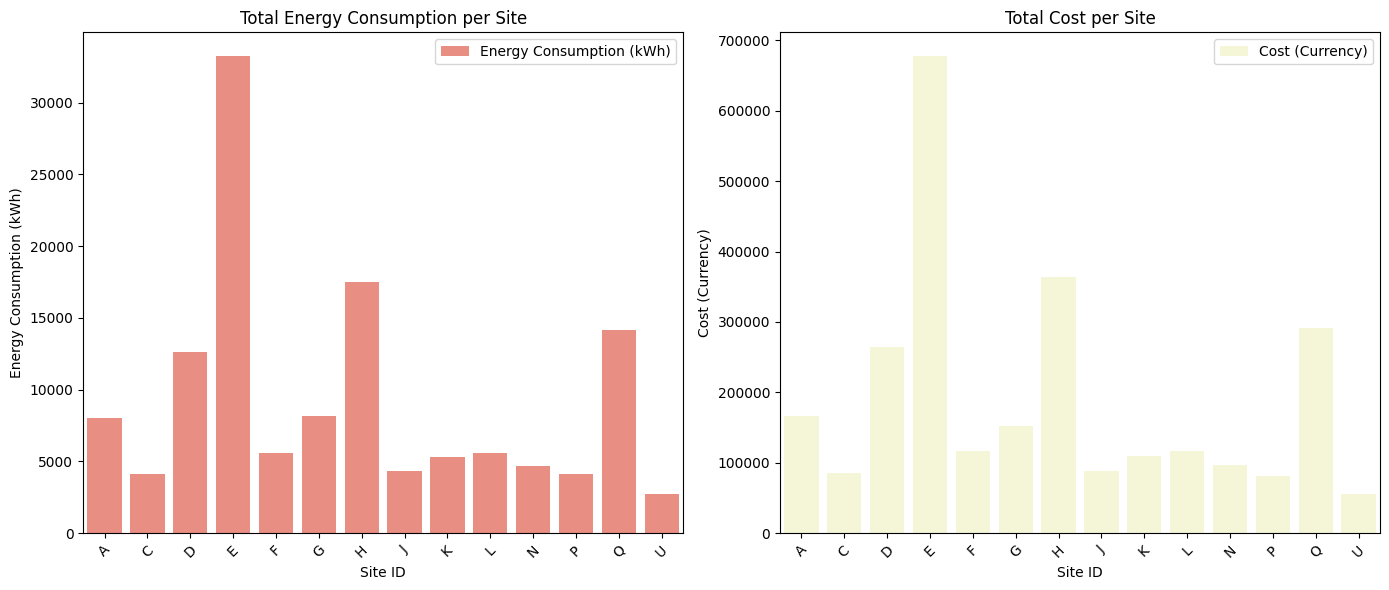

In [ ]:
# Create a figure with two subplots (side by side)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Create the bar chart for total energy consumption in the first subplot (ax[0])
sns.barplot(x=total_consumption.index, y=total_consumption.values, color='salmon', label='Energy Consumption (kWh)', ax=ax[0])

# Set labels for the axes of the energy consumption plot
ax[0].set_xlabel('Site ID')
ax[0].set_ylabel('Energy Consumption (kWh)')

# Set the title for the energy consumption plot
ax[0].set_title('Total Energy Consumption per Site')

# Rotate x-axis labels for better visibility in the energy consumption plot
ax[0].tick_params(axis='x', rotation=45)

# Create the bar chart for total cost in the second subplot (ax[1])
sns.barplot(x=total_cost.index, y=total_cost.values, color='lightgoldenrodyellow', label='Cost (Currency)', ax=ax[1])

# Set labels for the axes of the cost plot
ax[1].set_xlabel('Site ID')
ax[1].set_ylabel('Cost (Currency)')

# Set the title for the cost plot
ax[1].set_title('Total Cost per Site')

# Rotate x-axis labels for better visibility in the cost plot
ax[1].tick_params(axis='x', rotation=45)

# Improve layout to prevent overlapping of subplots
plt.tight_layout()

# Show both plots
plt.show()


* Total Energy Consumption per Site (kWh):
  * The total energy consumption per site was calculated using the energy consumption data for every half hour.
  * Different sites have varying energy consumption, including site "E," which consumed the highest amount of energy (33,243.78 kWh), while site "U" consumed the lowest amount (2,706.34 kWh).

* Total Cost per Site (in currency):
  * The total cost per site was calculated based on energy consumption.
  * The costs of the sites vary, with site "E" having the highest cost (677,459.84), while site "U" has the lowest cost (56,098.60).

* Conclusion:
  * The results show that sites with higher energy consumption incur higher costs, which is to be expected.

In [ ]:
# Calculate total energy consumption per region by summing the energy consumption for each region
total_consumption_region = merged_df.groupby('region')['KWH/hh (per half hour) '].sum()

# Calculate total cost per region by summing the cost for each region
total_cost_region = merged_df.groupby('region')['Cost'].sum()

# Display the total energy consumption for each region in kWh
print("\nTotal Energy Consumption per Region (kWh):")
print(total_consumption_region)

# Display the total cost for each region in currency
print("\nTotal Cost per Region (in currency):")
print(total_cost_region)


Total Energy Consumption per Region (kWh):
region
A    57986.697007
B    33810.890996
C    35654.589995
D     2706.338000
Name: KWH/hh (per half hour) , dtype: float64

Total Cost per Region (in currency):
region
A    1.192107e+06
B    6.953375e+05
C    7.221109e+05
D    5.609860e+04
Name: Cost, dtype: float64


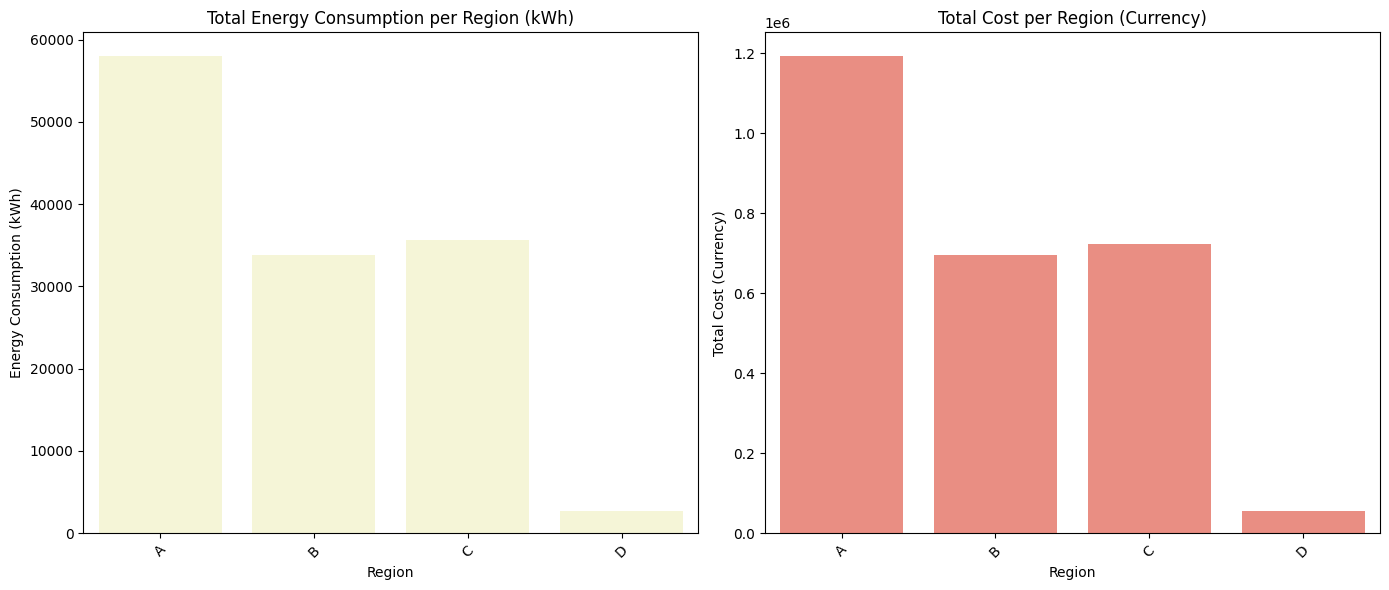

In [ ]:
# Create a figure with two subplots (side by side) for energy consumption and cost per region
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar chart for total energy consumption per region
sns.barplot(x=total_consumption_region.index, y=total_consumption_region.values, color='lightgoldenrodyellow', ax=ax[0])

# Set the title, x-label, and y-label for the energy consumption plot
ax[0].set_title('Total Energy Consumption per Region (kWh)')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Energy Consumption (kWh)')

# Rotate x-axis labels for better readability in the energy consumption plot
ax[0].tick_params(axis='x', rotation=45)

# Plot the bar chart for total cost per region
sns.barplot(x=total_cost_region.index, y=total_cost_region.values, color='salmon', ax=ax[1])

# Set the title, x-label, and y-label for the total cost plot
ax[1].set_title('Total Cost per Region (Currency)')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Total Cost (Currency)')

# Rotate x-axis labels for better readability in the cost plot
ax[1].tick_params(axis='x', rotation=45)

# Adjust the layout to ensure that the subplots don't overlap and are displayed properly
plt.tight_layout()

# Show the plot with both subplots (energy consumption and cost)
plt.show()

* Total Energy Consumption per Region (kWh):
  * The total energy consumption per region was calculated by summing the energy consumption of all the sites within each region.
  * Region "A" is the highest in energy consumption (57,986.70 kWh), while region "D" has the lowest consumption (2,706.34 kWh).

* Total Cost per Region (in currency):
  * The total cost per region was calculated based on energy consumption.
  * Region "A" has the highest cost (1,192,107.00), while region "D" has the lowest cost (56,098.60).

* Conclusion:
  * The results show that region "A" consumes the most energy and, therefore, has the highest cost, while region "D" consumes the least energy and, thus, has the lowest cost.

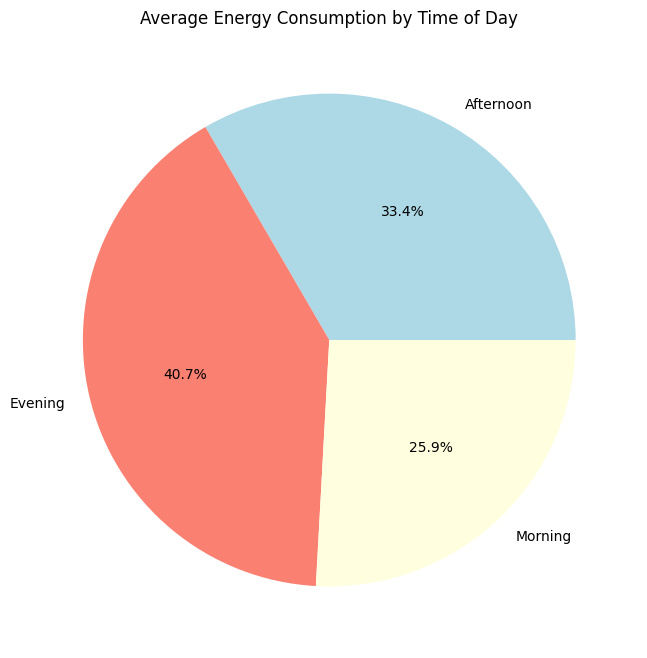

In [ ]:
# Step 1: Calculate the average energy consumption by time of day.
# We group the data by 'time_of_day' and calculate the mean energy consumption per time period.
avg_consumption_time_of_day = merged_df.groupby('time_of_day')['KWH/hh (per half hour) '].mean()

# Step 2: Plot the average energy consumption by time of day in a pie chart.
# The pie chart visually represents the proportion of energy consumed during different times of the day.
# The 'autopct' parameter adds percentage labels to each slice of the pie.
# The 'colors' parameter specifies the colors for each time period on the chart.
avg_consumption_time_of_day.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightyellow'], title='Average Energy Consumption by Time of Day')

# Remove the ylabel to clean up the chart presentation.
plt.ylabel('')

# Display the plot.
plt.show()


* the slice for "Evening" is the largest, it indicates that the evening hours have the highest energy usage.
  * it indicates that energy use is at its peak during that time. This could present an opportunity to implement strategies aimed at reducing energy consumption during these peak hours.
    * By focusing on reducing energy consumption during the "Evening" peak period, both homes and companies can reduce their electricity bills, decrease grid stress, and contribute to a more sustainable energy system. Implementing a combination of these strategies can help effectively manage and lower energy demand during peak hours.

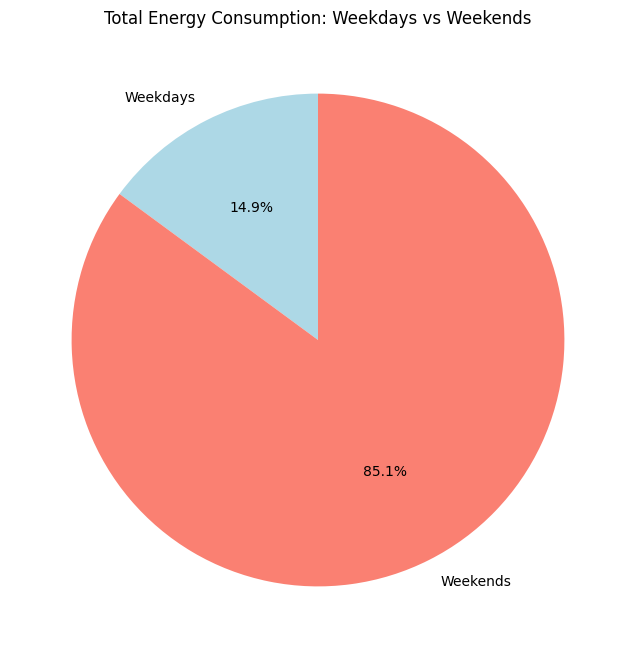

In [ ]:
# How does energy consumption vary between weekdays and weekends?
# Calculate total energy consumption for weekdays and weekends
total_consumption_weekend = merged_df.groupby('is_weekend')['KWH/hh (per half hour) '].sum()
total_consumption_weekend.index = ['Weekdays', 'Weekends']

# Plot the data in a pie chart
plt.figure(figsize=(8, 8))
total_consumption_weekend.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90, legend=False)
plt.title('Total Energy Consumption: Weekdays vs Weekends')
plt.ylabel('')
plt.show()


* The stark contrast in energy consumption between weekdays and weekends underscores the need for customized energy management strategies.

* Focusing on weekend consumption offers a valuable opportunity to reduce energy demand and encourage sustainable usage patterns.

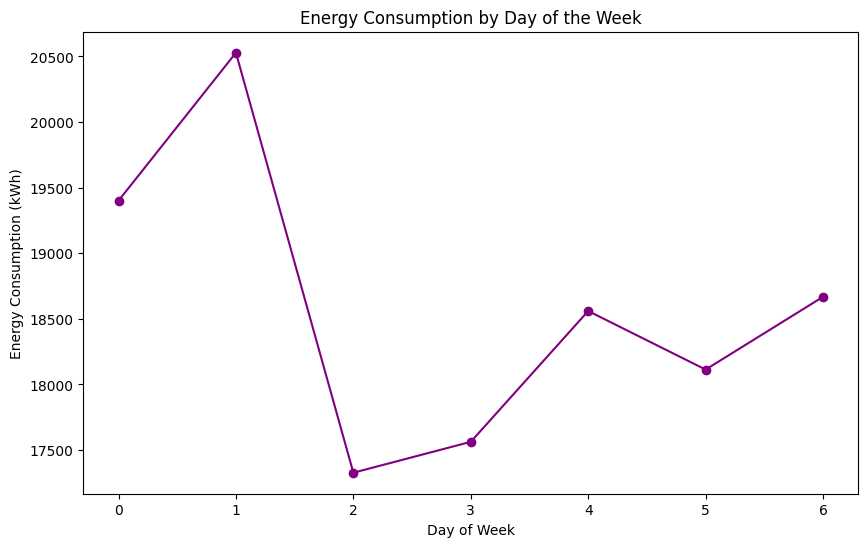

In [ ]:
# How does energy consumption change by day of the week?
total_consumption_day_of_week = merged_df.groupby('day_of_week')['KWH/hh (per half hour) '].sum()
total_consumption_day_of_week.plot(kind='line', figsize=(10, 6), marker='o', color='purple', title='Energy Consumption by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


* High Consumption (Sunday & Monday):
  * Increased household activities at the start and end of the week might explain the peaks.
  * Higher energy usage could result from tasks postponed for weekends or heavy weekday preparations.
* Lowest on Tuesday:
  * Possibly due to reduced household activities or work/school routines stabilizing mid-week.

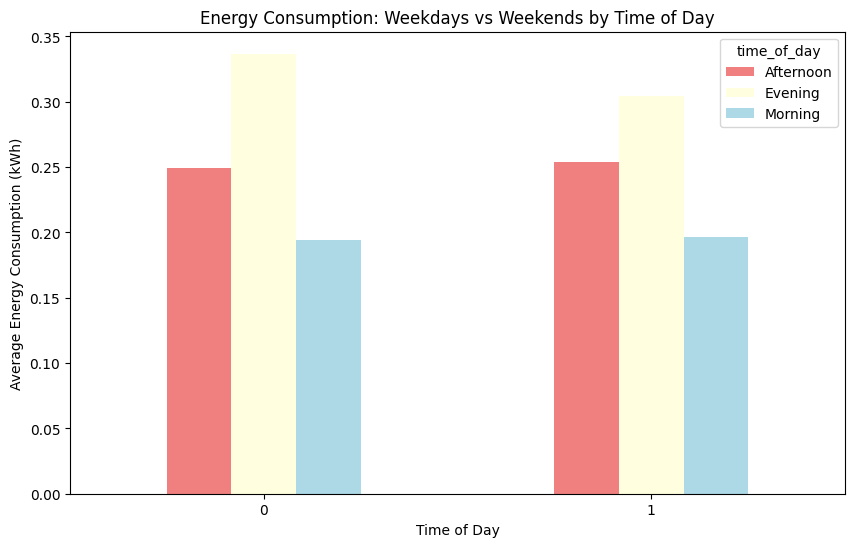

In [ ]:
# How does energy consumption compare between weekdays and weekends by time of day?
avg_consumption_weekend_time = merged_df.groupby(['is_weekend', 'time_of_day'])['KWH/hh (per half hour) '].mean().unstack()
avg_consumption_weekend_time.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightyellow', 'lightblue'], title='Energy Consumption: Weekdays vs Weekends by Time of Day')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xlabel('Time of Day')
plt.xticks(rotation=0)
plt.show()


* Evening Peaks: Both weekdays and weekends experience peak energy consumption during the evening.

* Minimal Morning Use: Mornings exhibit the least energy demand, possibly because people are away or activities are minimal.

* Weekend Increase: The slight increase in evening consumption on weekends indicates extended leisure or household activities.

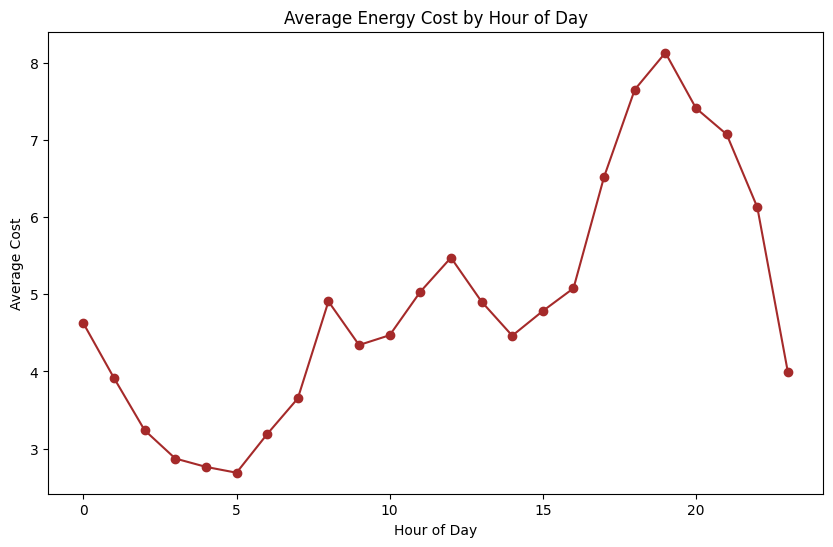

In [ ]:
# What is the variation in energy cost by hour of the day?
avg_cost_hour = merged_df.groupby('hour')['Cost'].mean()
avg_cost_hour.plot(kind='line', figsize=(10, 6), marker='o', color='brown', title='Average Energy Cost by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Cost')
plt.show()


* Evening Peaks: Higher energy demand during evening hours causes a sharp cost increase.
  * Targeting these hours for energy-saving measures is crucial.

* Off-Peak Opportunities: Late-night hours (3 AM–5 AM) offer lower energy costs, ideal for activities like running energy-intensive appliances (e.g., washing machines).

# Validate the below assumptions using the corresponding statistical tests:
---

In [ ]:
import scipy.stats as stats  # Importing scipy.stats to access statistical functions
from scipy.stats import f_oneway  # Specifically importing the f_oneway function for ANOVA test

## 1. Does the region significantly affect energy consumption?
---

1. Hypothesis Formulation

  * Null Hypothesis (H0): The region does not significantly affect energy consumption
    * (mean energy consumption is the same across regions).
  * Alternative Hypothesis (Ha): The region significantly affects energy consumption
    * (mean energy consumption differs across regions).

2. Test Selection and Application
  * Region and Energy Consumption:
    * Test: One-way ANOVA test
    * Reason: This test is appropriate because we want to compare the means of energy consumption across different regions, and we have categorical data (regions) and continuous data (energy consumption).
        * (The ANOVA test compares means across more than two groups (regions in this case))





* Interpretation:

  * If the p-value is less than 0.05, we reject the null hypothesis, indicating that the region significantly affects energy consumption.
  * If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning that the region does not significantly affect energy consumption.


In [ ]:
# Perform ANOVA test to check if region significantly affects energy consumption

# Step 1: Get the unique regions in the dataset
regions = merged_df['region'].unique()

# Step 2: Group energy consumption by each region
# For each region, we create a list of energy consumption values from the 'KWH/hh (per half hour)' column
energy_by_region = [merged_df[merged_df['region'] == region]['KWH/hh (per half hour) '] for region in regions]
# 'energy_by_region' is now a list of Series, each containing the energy consumption values for one region

# Step 3: Perform the ANOVA test using the f_oneway function
# The *energy_by_region unpacks the list into separate arguments, which f_oneway requires
f_stat, p_value = stats.f_oneway(*energy_by_region)

# Step 4: Output the result
# Print the F-statistic and p-value from the ANOVA test
print(f"ANOVA test result: F-statistic = {f_stat},\nP-value = {p_value}")

ANOVA test result: F-statistic = 38.834309355359395,
P-value = 4.396990942096681e-25


* F-statistic = 38.83:
  * This value reflects the ratio of variance between the groups (regions) to the variance within the groups.
    * The larger the value, the higher the likelihood that there is a significant difference between the groups.

* P-value = 4.39e-25 (or 0.00000000000000000000000439):
This value is much smaller than 0.05.
  * It indicates strong evidence to reject the null hypothesis (H0).

* Conclusion:
  * Reject the null hypothesis (H0): There is a statistically significant difference in energy consumption between regions.
  * The alternative hypothesis (Ha) confirms that the region has a significant effect on energy consumption.

* What does this mean practically?
  * Different regions exhibit different energy consumption patterns.
  * The reason for this difference could be geographic, economic, or demographic factors.

<ipython-input-70-862d1136a25c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='KWH/hh (per half hour) ', data=mean_energy, palette='muted')


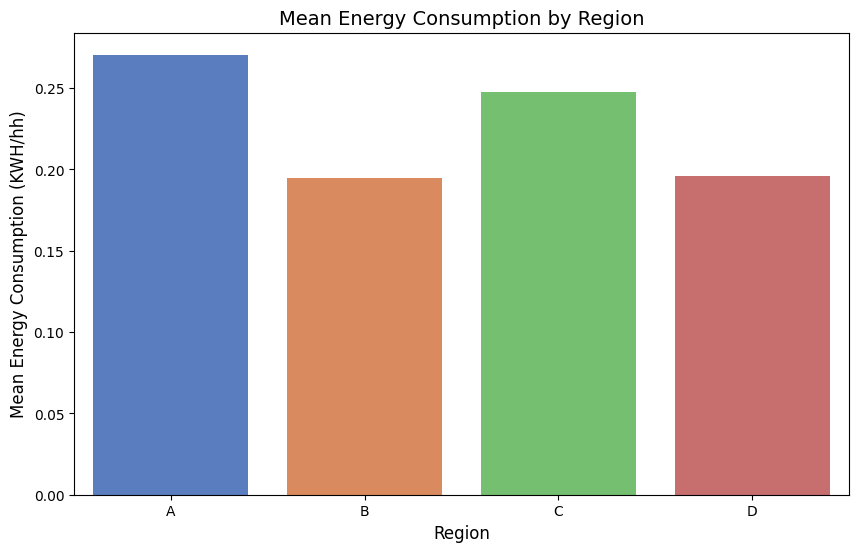

In [ ]:
# Calculate the mean energy consumption for each region
mean_energy = merged_df.groupby('region')['KWH/hh (per half hour) '].mean().reset_index()

# Create a bar plot with the size of the plot defined
plt.figure(figsize=(10, 6))

# Create a barplot using seaborn to show the mean energy consumption by region
sns.barplot(x='region', y='KWH/hh (per half hour) ', data=mean_energy, palette='muted')

# Add a title to the plot to describe what it shows
plt.title("Mean Energy Consumption by Region", fontsize=14)

# Add a label for the x-axis, indicating that it represents different regions
plt.xlabel("Region", fontsize=12)

# Add a label for the y-axis, indicating that it represents the mean energy consumption in KWH per half hour
plt.ylabel("Mean Energy Consumption (KWH/hh)", fontsize=12)

# Show the plot to visualize the results
plt.show()

## 2. Is there a relationship between the time of day and energy consumption?
---

1. Hypothesis Formulation

  * Null Hypothesis (H0): There is no relationship between time of day and energy consumption.
  * Alternative Hypothesis (Ha): There is a statistically significant relationship between time of day and energy consumption.

2. Test Selection and Application
  * Time of Day and Energy Consumption:
    * Test: One-way ANOVA test
    * Reason: This test will help determine if there are significant differences in energy consumption across the different times of the day.
      * (The ANOVA test can also be used to compare means across the categories of "time of day" (e.g., Morning, Afternoon, Evening).)

* Interpretation:

  * If the p-value is less than 0.05, we reject the null hypothesis, indicating that there is a significant relationship between the time of day and energy consumption.
  * If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning that there is no significant relationship between the time of day and energy consumption.


In [ ]:
# Perform ANOVA test to check if time of day significantly affects energy consumption
# Get all unique values of the 'time_of_day' column (e.g., Morning, Afternoon, Evening)
times_of_day = merged_df['time_of_day'].unique()

# For each time of day, extract the energy consumption data ('KWH/hh (per half hour) ') and group them into separate lists
energy_by_time_of_day = [merged_df[merged_df['time_of_day'] == time_of_day]['KWH/hh (per half hour) '] for time_of_day in times_of_day]

# Perform ANOVA test to check if there's a statistically significant difference in energy consumption based on the time of day
f_stat_time, p_value_time = stats.f_oneway(*energy_by_time_of_day)

# Output the result of the ANOVA test: the F-statistic and the p-value
# The F-statistic tells us how much variance there is between the groups compared to within the groups
# The p-value indicates if the difference is statistically significant
print(f"ANOVA test result for time of day: F-statistic = {f_stat_time},\nP-value = {p_value_time}")

ANOVA test result for time of day: F-statistic = 119.14275153468742,
P-value = 1.854639234791836e-52


* F-statistic = 119.14:

  * This value reflects the ratio of variance between the groups (times of day) to the variance within the groups.
  * A higher F-statistic indicates that there is a significant difference in energy consumption between the different times of day.
  * The value of 119.14 is large, suggesting that the differences in energy consumption across different times of day are substantial.

* P-value = 1.85e-52 (or 0.00000000000000000000000185):

  * This value is extremely small, much smaller than the common significance level of 0.05.
  * It provides strong evidence to reject the null hypothesis (H0), which suggests that there is no difference in energy consumption based on the time of day.
  * A p-value this small indicates that the observed differences are highly unlikely to have occurred by chance.

* Conclusion:

  * Reject the null hypothesis (H0): There is a statistically significant relationship between the time of day and energy consumption.
  * The alternative hypothesis (Ha) confirms that the time of day significantly affects energy consumption.

* What does this mean practically?

  * Energy consumption varies significantly across different times of day (e.g., Morning, Afternoon, Evening).
  * This means that certain times of the day, such as peak hours, might exhibit higher consumption compared to off-peak hours.
  * Companies or energy providers can use this information to develop strategies for optimizing energy usage, such as offering lower prices during off-peak hours when energy consumption is lower.

<ipython-input-72-95639549d896>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='KWH/hh (per half hour) ', data=mean_energy, palette='muted')


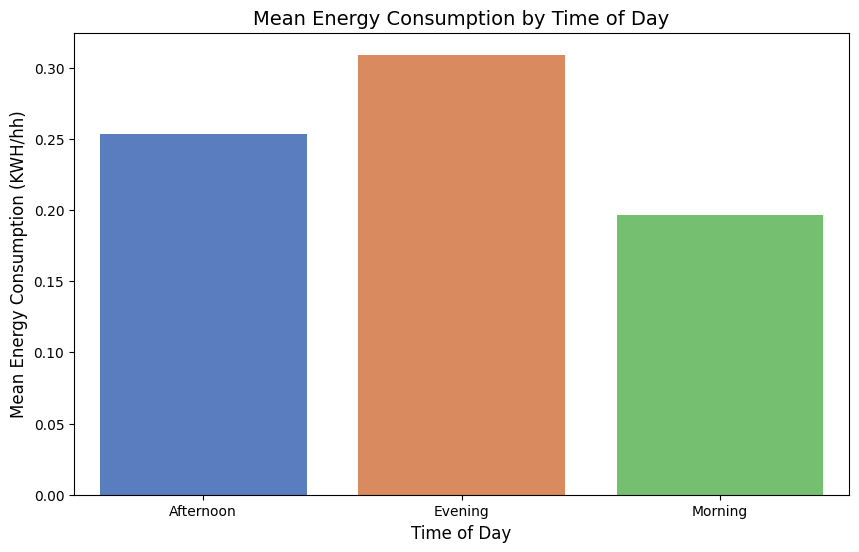

In [ ]:
# Calculate the mean energy consumption for each time of day
mean_energy = merged_df.groupby('time_of_day')['KWH/hh (per half hour) '].mean().reset_index()

# Create a bar plot with the size of the plot defined
plt.figure(figsize=(10, 6))

# Create a barplot using seaborn to show the mean energy consumption by time of day
sns.barplot(x='time_of_day', y='KWH/hh (per half hour) ', data=mean_energy, palette='muted')

# Add a title to the plot to describe what it shows
plt.title("Mean Energy Consumption by Time of Day", fontsize=14)

# Add a label for the x-axis, indicating that it represents different times of the day
plt.xlabel("Time of Day", fontsize=12)

# Add a label for the y-axis, indicating that it represents the mean energy consumption in KWH per half hour
plt.ylabel("Mean Energy Consumption (KWH/hh)", fontsize=12)

# Show the plot to visualize the results
plt.show()

# Assuming that we can shutdown few cells were the consumption is low, what is the threshold that you would recommend and how much KW and EGP it would save accordingly?
---

* Threshold Determination:

  * We need to determine the threshold below which we can shut down the cells
    * (i.e., identify when energy consumption is low enough to justify turning off a cell).
  * This threshold should be based on a combination of data-driven insights (such as average consumption across cells) and practical considerations (such as how much consumption reduction justifies the costs and potential impact of turning off cells).

* Cost Savings Calculation:

  * Once the threshold is determined, we need to calculate how much energy (KW) we can save by shutting down the cells that fall below this threshold.
  * Then, we calculate the savings in terms of EGP, considering the different demand price rates (high, normal, and low).

1. Threshold Determination:
  * We can define a threshold based on the quantile of energy consumption across all cells (e.g., the 25th percentile, or the bottom 25% of cells with the lowest consumption).
    * This means that the cells consuming less energy than the threshold can be considered for shutdown.

* Steps:

  * Calculate the energy consumption for each cell.
  * Determine the energy consumption distribution (e.g., using a histogram or quantiles).
  * Set a threshold for shutting down cells (e.g., the bottom 25% or a specific value based on business requirements).


2. Cost Savings Calculation:

* Steps:

  * Identify the cells that can be shut down: These are the cells with energy consumption below the threshold.
  * Calculate the total KW saved: This will be the sum of energy consumption of the cells that are below the threshold.
  * Calculate the cost savings in EGP: Based on the demand price, we can multiply the saved KW by the cost per KW (in high, normal, or low demand periods).

In [ ]:
import numpy as np

# Step 1: Calculate the threshold (25th percentile as an example)
# We use the 25th percentile of the energy consumption data to determine the low consumption threshold
threshold = merged_df['KWH/hh (per half hour) '].quantile(0.25)
print(f"Low consumption threshold: {threshold:.4f} KWH")

# Step 2: Identify cells with low energy consumption
# We group the data by 'cell_id' and calculate the average energy consumption per cell
# Cells with average consumption below the threshold are identified as low consumption cells
low_consumption_cells = (
    merged_df.groupby('cell_id')['KWH/hh (per half hour) '].mean() < threshold
)

# Extract the IDs of the low consumption cells
low_consumption_cell_ids = low_consumption_cells[low_consumption_cells].index
print(f"Cells that can be considered for shutdown: {list(low_consumption_cell_ids)}")

# Step 3: Calculate potential savings (both KWH and EGP)
# Filter the merged data to only include rows for the identified low consumption cells
low_consumption_df = merged_df[merged_df['cell_id'].isin(low_consumption_cell_ids)]

# Calculate the total energy savings in KWH by summing the energy consumption of the selected cells
total_savings_kwh = low_consumption_df['KWH/hh (per half hour) '].sum()

# Calculate the average cost per KWH (cost per unit of energy consumed)
avg_cost_per_kwh = merged_df['Cost'].sum() / merged_df['KWH/hh (per half hour) '].sum()

# Calculate the total savings in EGP by multiplying the KWH saved by the average cost per KWH
total_savings_egp = total_savings_kwh * avg_cost_per_kwh

print(f"Potential savings: {total_savings_kwh:.2f} KWH, {total_savings_egp:.2f} EGP")


# Alternate calculation using NumPy for 25th percentile threshold

# Calculate the 25th percentile using NumPy
cell_consumption = merged_df.groupby('cell_id')['KWH/hh (per half hour) '].mean()
threshold = np.percentile(cell_consumption, 25)

# Identify cells that consume less than the threshold
low_consumption_cells = cell_consumption[cell_consumption < threshold]

# Calculate the total KWH saved by shutting down the identified cells
kw_saved = low_consumption_cells.sum()

# Define the cost per KWH in different demand periods (in EGP)
cost_per_kw_low = 0.5  # Example value for low demand period
cost_per_kw_normal = 1  # Example value for normal demand period
cost_per_kw_high = 1.5  # Example value for high demand period

# Assuming energy consumption mainly occurs during normal periods, calculate the savings
egp_saved = kw_saved * cost_per_kw_normal

# Print the results for the alternate calculation
print(f"Threshold for shutdown: {threshold} KWH")
print(f"Total KWH saved: {kw_saved} KWH")
print(f"Total savings in EGP: {egp_saved}")


Low consumption threshold: 0.0650 KWH
Cells that can be considered for shutdown: ['MAC000004', 'MAC000006', 'MAC000012', 'MAC000016', 'MAC000029', 'MAC000036', 'MAC000037']
Potential savings: 1857.65 KWH, 38044.72 EGP
Threshold for shutdown: 0.11019299769603588 KWH
Total KWH saved: 1.5575383807876149 KWH
Total savings in EGP: 1.5575383807876149


* Comparison Between the Two Thresholds:
1. First Threshold (0.0650 KWH):
  * Potential Savings:
  * Energy: 1857.65 KWH
  * Cost: 38,044.72 EGP
  * Number of Cells Eligible for Shutdown: 7 cells
  * Effectiveness: Significant energy and cost savings, but it requires ensuring the shutdown does not impact operational processes.

2. Second Threshold (0.1102 KWH):
  * Potential Savings:
  * Energy: 1.56 KWH
  * Cost: 1.56 EGP
  * Number of Cells Eligible for Shutdown: Very few cells.
  * Effectiveness: Ineffective for optimizing energy consumption or cost reduction.

* Final Recommendations:
  * Adopt the First Threshold:It provides a better balance between significant energy and cost savings while considering operational impact.

* Analyze the Impact of Shutdown:
  * Ensure no critical operations are affected.
  * Study the possibility of redistributing loads among cells to reduce complete shutdowns.

* Implement Shutdown During Suitable Periods:
  * Select periods of low demand, such as holidays or off-peak hours.

* Monitor Results Post-Implementation:
  * Track the system’s performance after shutdown to evaluate the success of the plan and make adjustments if needed.

* Explore Alternative Scenarios:
  * Test different thresholds or operational scenarios to determine the best balance between savings and performance.

* Next Steps:
  * Present the results to management, highlighting the advantages of the first threshold.
  * Include a clear implementation plan with monitoring phases to ensure the success of the initiative.

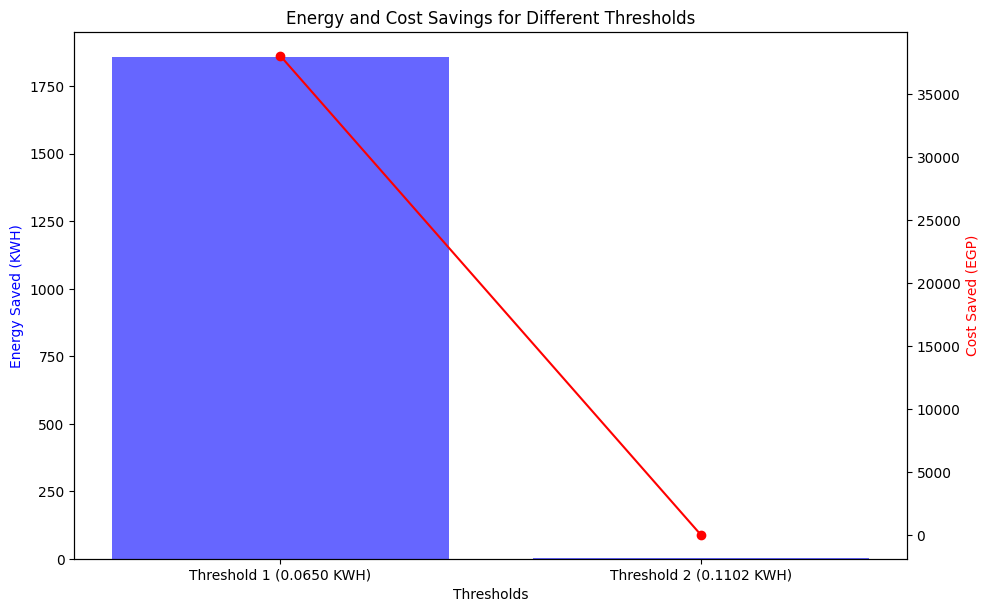

In [ ]:
# Define the thresholds, energy savings, and cost savings for each threshold
thresholds = ['Threshold 1 (0.0650 KWH)', 'Threshold 2 (0.1102 KWH)']
energy_savings = [1857.65, 1.56]
cost_savings = [38044.72, 1.56]

# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a bar chart for energy savings (KWH) with blue color
ax1.bar(thresholds, energy_savings, color='blue', alpha=0.6, label='Energy Saved (KWH)')
ax1.set_xlabel('Thresholds')  # Set the x-axis label
ax1.set_ylabel('Energy Saved (KWH)', color='blue')  # Set the y-axis label for energy savings

# Create a second y-axis sharing the same x-axis for cost savings (EGP)
ax2 = ax1.twinx()
ax2.plot(thresholds, cost_savings, color='red', marker='o', label='Cost Saved (EGP)')
ax2.set_ylabel('Cost Saved (EGP)', color='red')  # Set the y-axis label for cost savings

# Adjust the layout for better spacing
fig.tight_layout()

# Set the title for the plot
plt.title('Energy and Cost Savings for Different Thresholds')

# Show the plot
plt.show()